## Observations and Insights 

In [223]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [224]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.count()
study_results.count()

# Combine the data into a single dataset
complete_data_df = pd.merge(mouse_metadata, study_results, how = "outer", on="Mouse ID")

# Display the data table for preview
complete_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [225]:
# Checking the number of mice.

mice_number = len(complete_data_df["Mouse ID"].unique())

print(f"Number of Mice = {mice_number}")


Number of Mice = 249


In [226]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = complete_data_df.groupby(["Mouse ID", "Timepoint"])
duplicate_mice2_df = duplicate_mice.count()

duplicate_mice2_df.loc[(duplicate_mice2["Sex"] > 1), :]

 

NameError: name 'duplicate_mice2' is not defined

In [227]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = complete_data_df.loc[complete_data_df["Mouse ID"] == "g989", :]

duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [228]:
# Create a clean DataFrame by dropping the duplicate mouse by its Index ID.

clean_data_df = complete_data_df.drop(index=[909, 911, 913, 915, 917])

# Double check the duplicate data for Mouse g989 has been removed.
duplicate_mouse2 = clean_data_df.loc[clean_data_df["Mouse ID"] == "g989", :]

duplicate_mouse2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [229]:
# Checking the number of mice in the clean DataFrame.
mice_number2 = len(clean_data_df["Mouse ID"].unique())

print(f"Number of Mice = {mice_number}")

Number of Mice = 249


## Summary Statistics

In [230]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimen_df = clean_data_df[["Drug Regimen", "Tumor Volume (mm3)"]]

drug_regimen = clean_data_df["Drug Regimen"].unique()


Capomulin_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Capomulin"), :]
Capomulin_mean = Capomulin_df["Tumor Volume (mm3)"].mean()
Capomulin_median = Capomulin_df["Tumor Volume (mm3)"].median()
Capomulin_sd = Capomulin_df["Tumor Volume (mm3)"].std()
Capomulin_var = Capomulin_df["Tumor Volume (mm3)"].var()
Capomulin_sem = Capomulin_df["Tumor Volume (mm3)"].sem()

Placebo_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Placebo"), :]
Placebo_mean = Placebo_df["Tumor Volume (mm3)"].mean()
Placebo_median = Placebo_df["Tumor Volume (mm3)"].median()
Placebo_sd = Placebo_df["Tumor Volume (mm3)"].std()
Placebo_var = Placebo_df["Tumor Volume (mm3)"].var()
Placebo_sem = Placebo_df["Tumor Volume (mm3)"].sem()

Ceftamin_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Ceftamin"), :]
Ceftamin_mean = Ceftamin_df["Tumor Volume (mm3)"].mean()
Ceftamin_median = Ceftamin_df["Tumor Volume (mm3)"].median()
Ceftamin_sd = Ceftamin_df["Tumor Volume (mm3)"].std()
Ceftamin_var = Ceftamin_df["Tumor Volume (mm3)"].var()
Ceftamin_sem = Ceftamin_df["Tumor Volume (mm3)"].sem()

Infubinol_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Infubinol"), :]
Infubinol_mean = Infubinol_df["Tumor Volume (mm3)"].mean()
Infubinol_median = Infubinol_df["Tumor Volume (mm3)"].median()
Infubinol_sd = Infubinol_df["Tumor Volume (mm3)"].std()
Infubinol_var = Infubinol_df["Tumor Volume (mm3)"].var()
Infubinol_sem = Infubinol_df["Tumor Volume (mm3)"].sem()

Ketapril_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Ketapril"), :]
Ketapril_mean = Ketapril_df["Tumor Volume (mm3)"].mean()
Ketapril_median = Ketapril_df["Tumor Volume (mm3)"].median()
Ketapril_sd = Ketapril_df["Tumor Volume (mm3)"].std()
Ketapril_var = Ketapril_df["Tumor Volume (mm3)"].var()
Ketapril_sem = Ketapril_df["Tumor Volume (mm3)"].sem()

Naftisol_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Naftisol"), :]
Naftisol_mean = Naftisol_df["Tumor Volume (mm3)"].mean()
Naftisol_median = Naftisol_df["Tumor Volume (mm3)"].median()
Naftisol_sd = Naftisol_df["Tumor Volume (mm3)"].std()
Naftisol_var = Naftisol_df["Tumor Volume (mm3)"].var()
Naftisol_sem = Naftisol_df["Tumor Volume (mm3)"].sem()

Propriva_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Propriva"), :]
Propriva_mean = Propriva_df["Tumor Volume (mm3)"].mean()
Propriva_median = Propriva_df["Tumor Volume (mm3)"].median()
Propriva_sd = Propriva_df["Tumor Volume (mm3)"].std()
Propriva_var = Propriva_df["Tumor Volume (mm3)"].var()
Propriva_sem = Propriva_df["Tumor Volume (mm3)"].sem()

Ramicane_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Ramicane"), :]
Ramicane_mean = Ramicane_df["Tumor Volume (mm3)"].mean()
Ramicane_median = Ramicane_df["Tumor Volume (mm3)"].median()
Ramicane_sd = Ramicane_df["Tumor Volume (mm3)"].std()
Ramicane_var = Ramicane_df["Tumor Volume (mm3)"].var()
Ramicane_sem = Ramicane_df["Tumor Volume (mm3)"].sem()

Stelasyn_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Stelasyn"), :]
Stelasyn_mean = Stelasyn_df["Tumor Volume (mm3)"].mean()
Stelasyn_median = Stelasyn_df["Tumor Volume (mm3)"].median()
Stelasyn_sd = Stelasyn_df["Tumor Volume (mm3)"].std()
Stelasyn_var = Stelasyn_df["Tumor Volume (mm3)"].var()
Stelasyn_sem = Stelasyn_df["Tumor Volume (mm3)"].sem()

Zoniferol_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Zoniferol"), :]
Zoniferol_mean = Zoniferol_df["Tumor Volume (mm3)"].mean()
Zoniferol_median = Zoniferol_df["Tumor Volume (mm3)"].median()
Zoniferol_sd = Zoniferol_df["Tumor Volume (mm3)"].std()
Zoniferol_var = Zoniferol_df["Tumor Volume (mm3)"].var()
Zoniferol_sem = Zoniferol_df["Tumor Volume (mm3)"].sem()

drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
mean = [Ramicane_mean, Capomulin_mean, Infubinol_mean, Placebo_mean, Ceftamin_mean, Stelasyn_mean, Zoniferol_mean, Ketapril_mean, Propriva_mean, Naftisol_mean]

  
summary1_df = pd.DataFrame([
    {"Drug Regimen": "Capomulin", "Tumor Volume (Mean)" : Capomulin_mean, "Tumor Volume (Median)" : Capomulin_median, "Tumor Volume (Std)" : Capomulin_sd, "Tumor Volume (Var)": Capomulin_var, "Tumor Volume (Sem)" : Capomulin_sem},
    {"Drug Regimen": "Placebo", "Tumor Volume (Mean)" : Placebo_mean, "Tumor Volume (Median)" : Placebo_median, "Tumor Volume (Std)" : Placebo_sd, "Tumor Volume (Var)": Placebo_var, "Tumor Volume (Sem)" : Placebo_sem},
    {"Drug Regimen": "Ceftamin", "Tumor Volume (Mean)" : Ceftamin_mean, "Tumor Volume (Median)" : Ceftamin_median, "Tumor Volume (Std)" : Ceftamin_sd, "Tumor Volume (Var)": Ceftamin_var, "Tumor Volume (Sem)" : Ceftamin_sem},
    {"Drug Regimen": "Infubinol", "Tumor Volume (Mean)" : Infubinol_mean, "Tumor Volume (Median)" : Infubinol_median, "Tumor Volume (Std)" : Infubinol_sd, "Tumor Volume (Var)": Infubinol_var, "Tumor Volume (Sem)" : Infubinol_sem},
    {"Drug Regimen": "Ketapril", "Tumor Volume (Mean)" : Ketapril_mean, "Tumor Volume (Median)" : Ketapril_median, "Tumor Volume (Std)" : Ketapril_sd, "Tumor Volume (Var)": Ketapril_var, "Tumor Volume (Sem)" : Ketapril_sem},
    {"Drug Regimen": "Naftisol", "Tumor Volume (Mean)" : Naftisol_mean, "Tumor Volume (Median)" : Naftisol_median, "Tumor Volume (Std)" : Naftisol_sd, "Tumor Volume (Var)": Naftisol_var, "Tumor Volume (Sem)" : Naftisol_sem},
    {"Drug Regimen": "Propriva", "Tumor Volume (Mean)" : Propriva_mean, "Tumor Volume (Median)" : Propriva_median, "Tumor Volume (Std)" : Propriva_sd, "Tumor Volume (Var)": Propriva_var, "Tumor Volume (Sem)" : Propriva_sem},
    {"Drug Regimen": "Ramicane", "Tumor Volume (Mean)" : Ramicane_mean, "Tumor Volume (Median)" : Ramicane_median, "Tumor Volume (Std)" : Ramicane_sd, "Tumor Volume (Var)": Ramicane_var, "Tumor Volume (Sem)" : Ramicane_sem},
    {"Drug Regimen": "Stelasyn", "Tumor Volume (Mean)" : Stelasyn_mean, "Tumor Volume (Median)" : Stelasyn_median, "Tumor Volume (Std)" : Stelasyn_sd, "Tumor Volume (Var)": Stelasyn_var, "Tumor Volume (Sem)" : Stelasyn_sem},
    {"Drug Regimen": "Zoniferol", "Tumor Volume (Mean)" : Zoniferol_mean, "Tumor Volume (Median)" : Zoniferol_median, "Tumor Volume (Std)" : Zoniferol_sd, "Tumor Volume (Var)": Zoniferol_var, "Tumor Volume (Sem)" : Zoniferol_sem}
])

summary1_df = summary1_df.sort_values(["Tumor Volume (Mean)"], ascending=False)

summary1_df

,Drug Regimen,Tumor Volume (Mean),Tumor Volume (Median),Tumor Volume (Std),Tumor Volume (Var),Tumor Volume (Sem)
4,Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
5,Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
8,Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111
1,Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
9,Zoniferol,53.236507,51.818479,6.966589,48.533355,0.516398
3,Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
2,Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
6,Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
0,Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
7,Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955


In [231]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summary2 = clean_data_df.groupby(["Drug Regimen"])

mean = summary2["Tumor Volume (mm3)"].mean()
median = summary2["Tumor Volume (mm3)"].median()
sd = summary2["Tumor Volume (mm3)"].std()
var = summary2["Tumor Volume (mm3)"].var()
sem = summary2["Tumor Volume (mm3)"].sem()


summary2_df = pd.DataFrame({"Tumor Volume (Mean)" : mean, "Tumor Volume (Median)" : median, "Tumor Volume (Std)" : sd, "Tumor Volume (Var)" : var, 
"Tumor Volume (Sem)" : sem})
     
summary2_df = summary2_df.sort_values(["Tumor Volume (Mean)"], ascending=False)

summary2_df

,Tumor Volume (Mean),Tumor Volume (Median),Tumor Volume (Std),Tumor Volume (Var),Tumor Volume (Sem)
Drug Regimen,,,,,
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Zoniferol,53.236507,51.818479,6.966589,48.533355,0.516398
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346


## Bar and Pie Charts

<IPython.core.display.Javascript object>


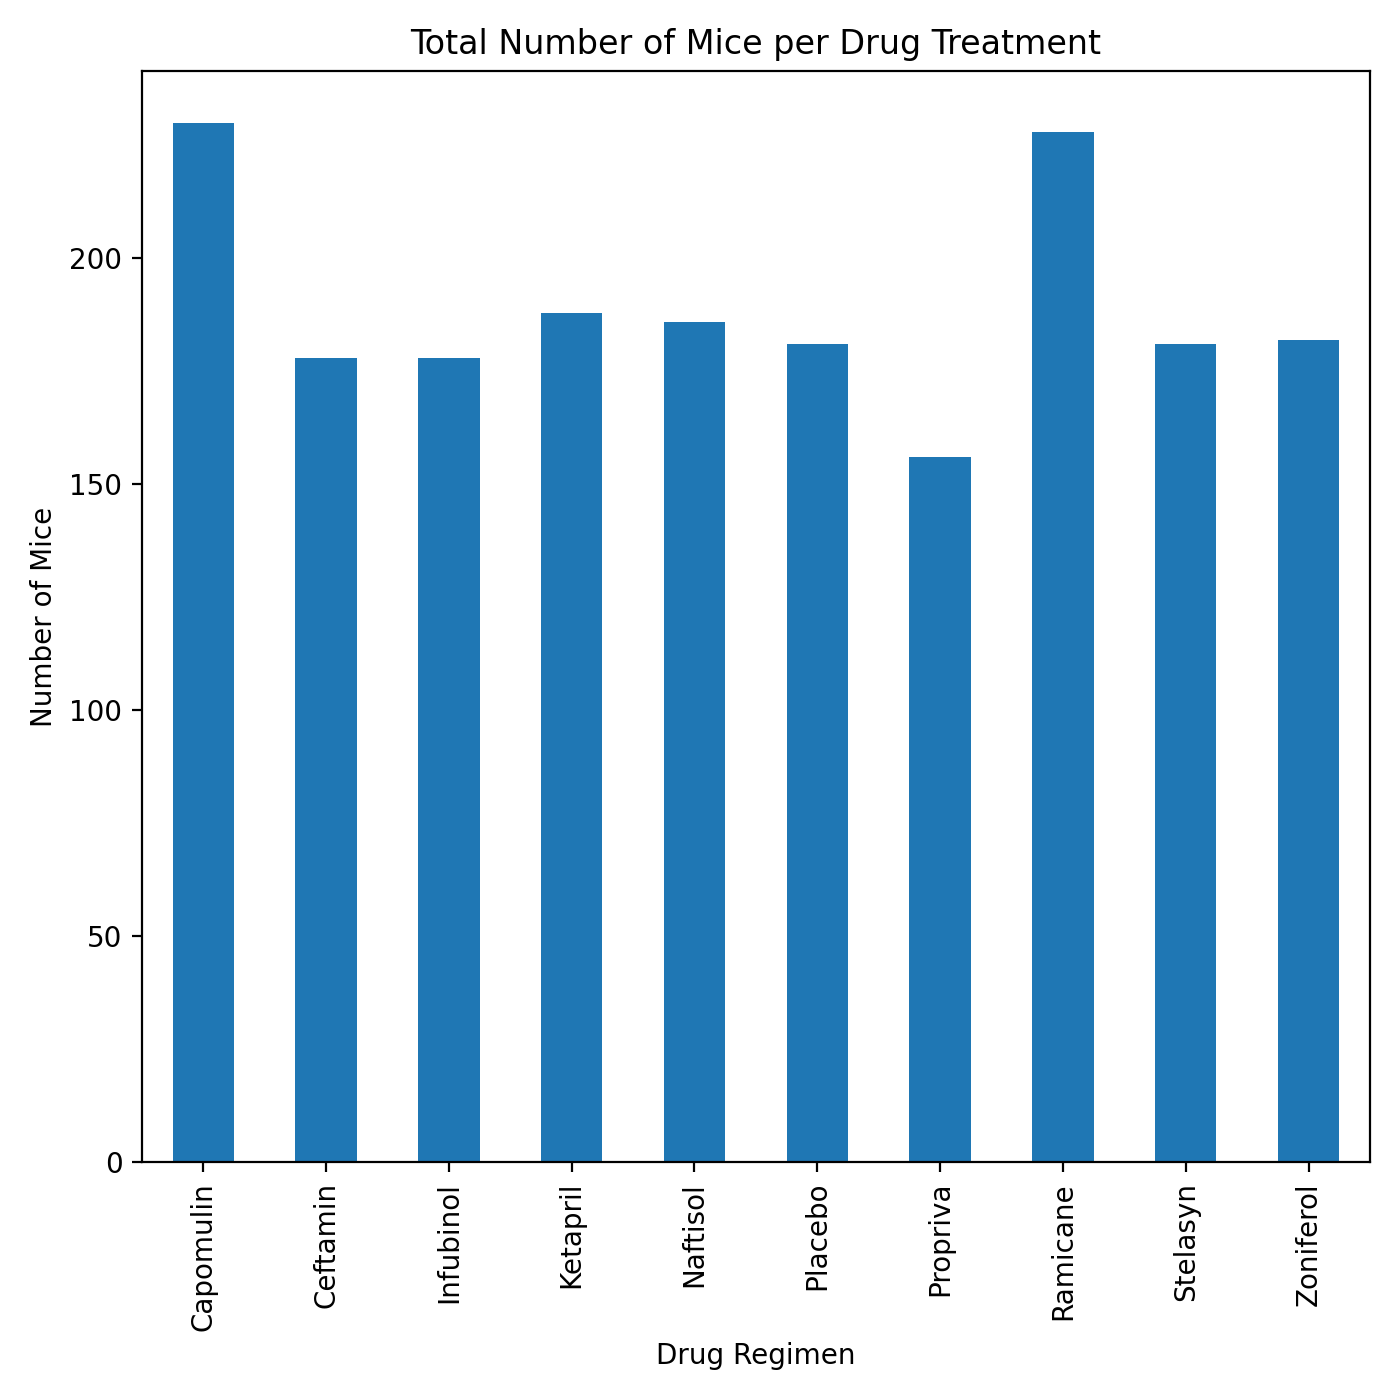

In [234]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study -
# using pandas. 

summary2_df = clean_data_df.groupby(["Drug Regimen"])
totalmice1 = summary2_df["Mouse ID"].count()

totalmice1_plot = totalmice.plot(kind="bar", figsize=(7,7))
plt.title("Total Number of Mice per Drug Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


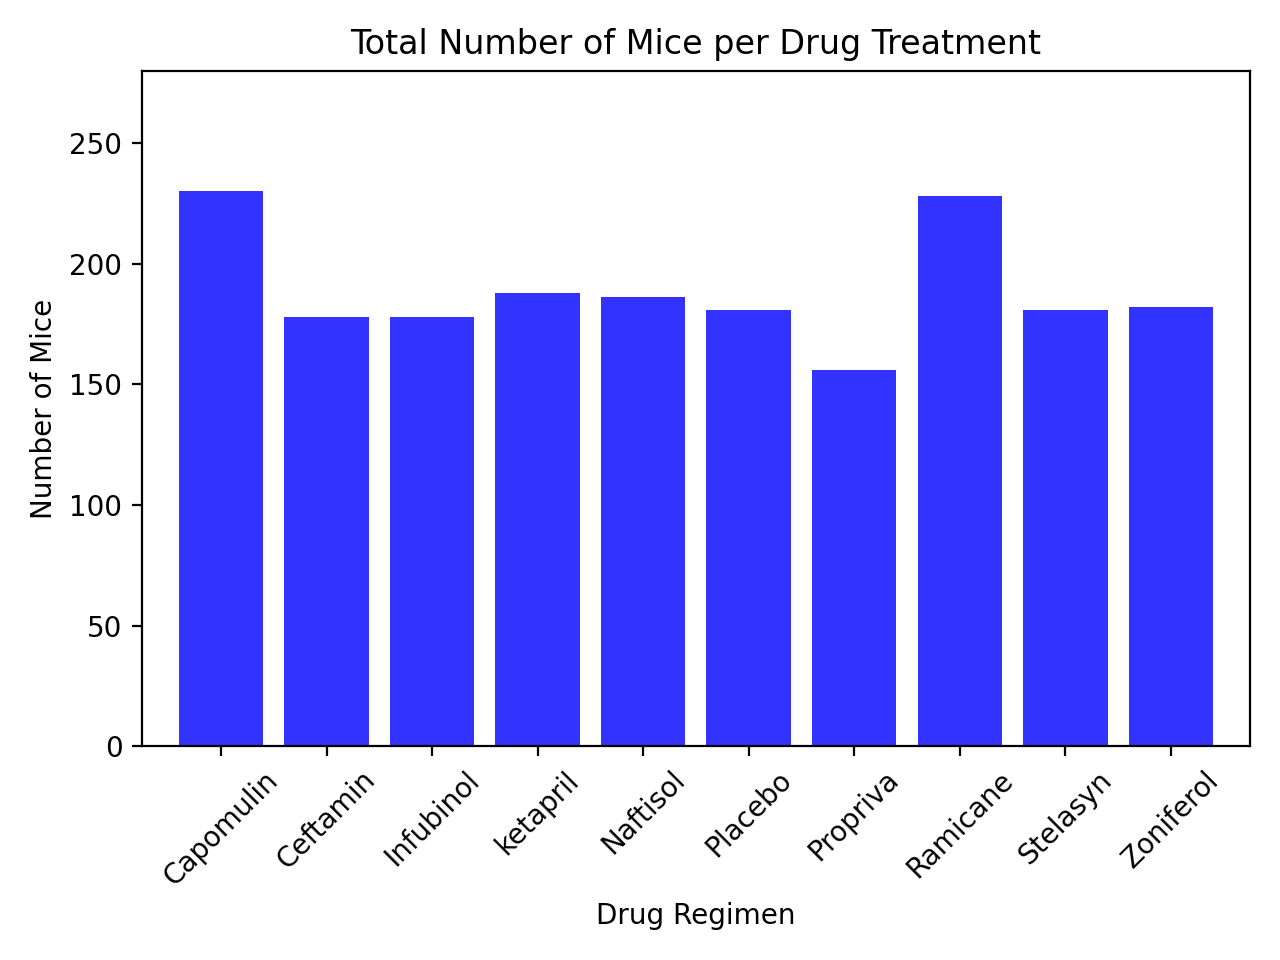

In [235]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study - 
# using pyplot.
summary2_df = clean_data_df.groupby(["Drug Regimen"])
totalmice2 = summary2_df["Mouse ID"].count()
x_axis = np.arange(len(totalmice2))
plt.bar(x_axis, totalmice, color="b", alpha=0.8, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(totalmice2)+50)
plt.title("Total Number of Mice per Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


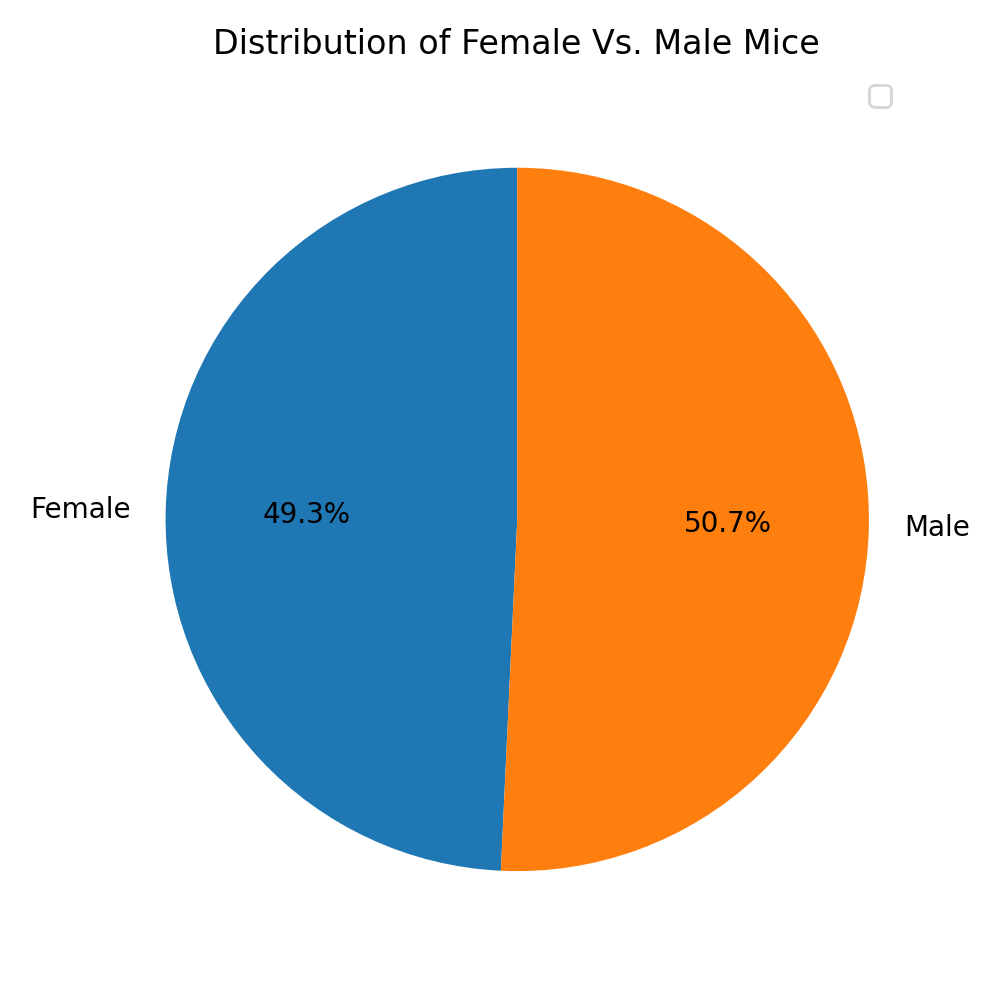

In [236]:
# Generate a pie plot showing the distribution of female versus male mice -  
# using pandas
gender_df = clean_data_df[["Sex", "Mouse ID"]]
gender = gender_df.groupby(["Sex"])
gender_count = gender.count()

gender_count


gender_count.plot.pie(subplots=True, figsize=(5,5), autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female Vs. Male Mice")
plt.ylabel("")
plt.axis("equal")
plt.legend("")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


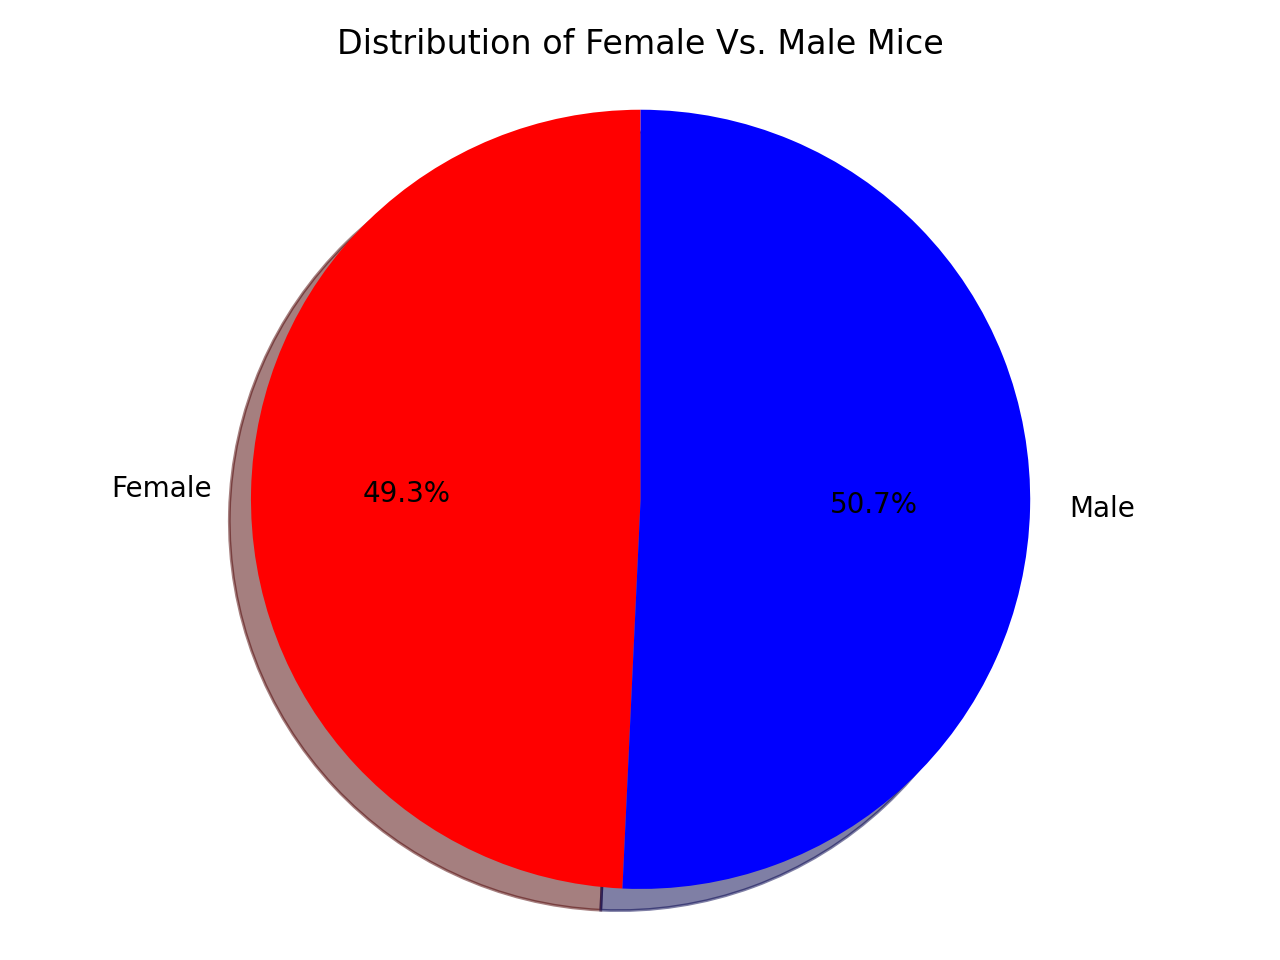

/Users/ajwu/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


In [237]:
# Generate a pie plot showing the distribution of female versus male mice - 
# using pyplot
categories = ["Female", "Male"]
data = gender_count
colors = ["r", "b"]
explode = (0,0)

plt.pie(data, explode = explode, labels=categories, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of Female Vs. Male Mice")
plt.axis("equal")
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

<IPython.core.display.Javascript object>


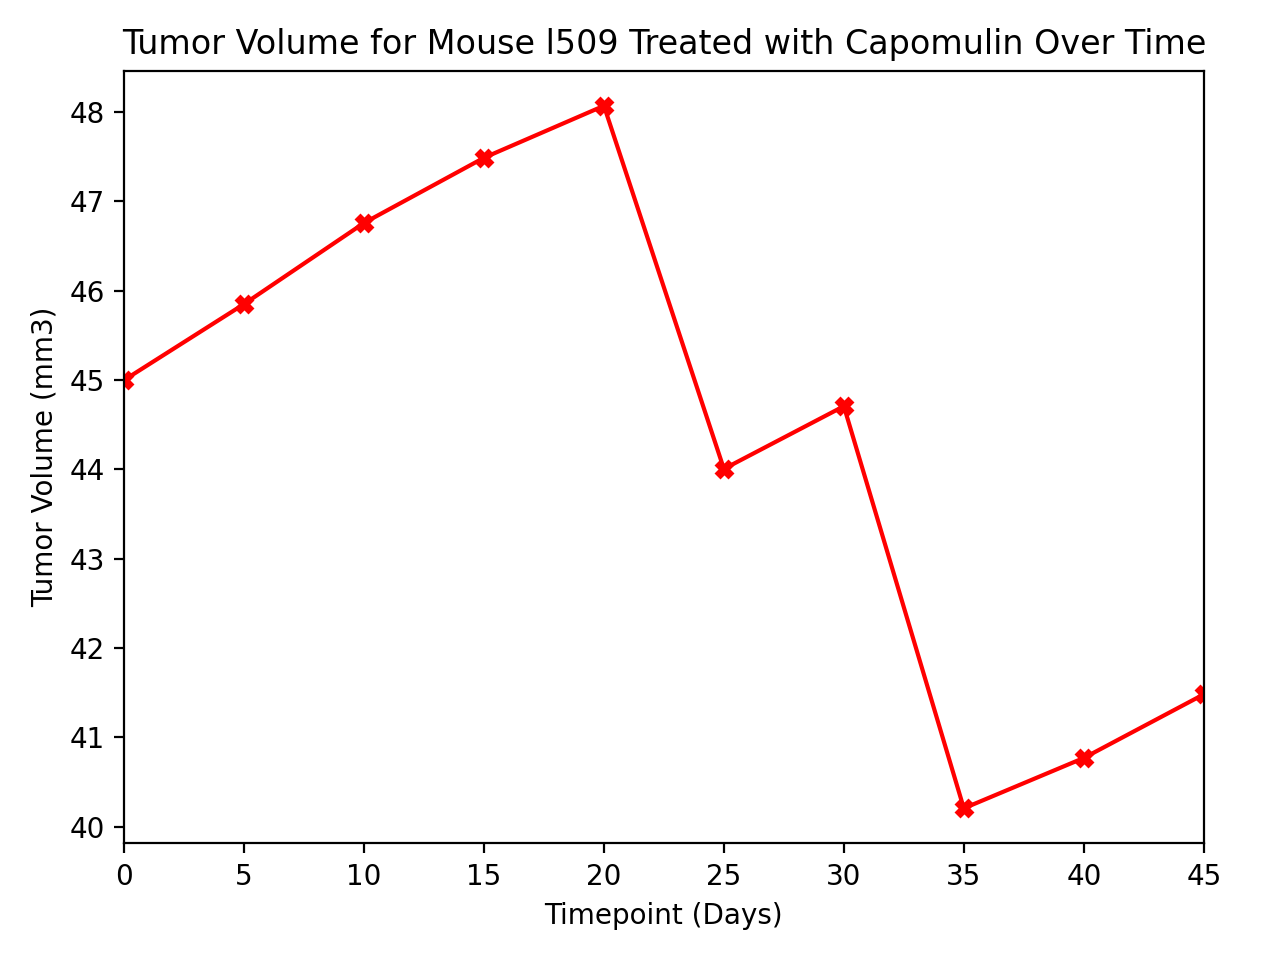

In [238]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mice_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Capomulin"), :]
l509_mouse_df = capomulin_mice_df.loc[(capomulin_mice_df["Mouse ID"] == "l509"), :]

timepoint = l509_mouse_df["Timepoint"]
l509_tumor_volume = l509_mouse_df["Tumor Volume (mm3)"]

l509_tumor = plt.plot(timepoint, l509_tumor_volume, marker="X", color="red", label = "S185")

plt.title("Tumor Volume for Mouse l509 Treated with Capomulin Over Time")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 45)
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


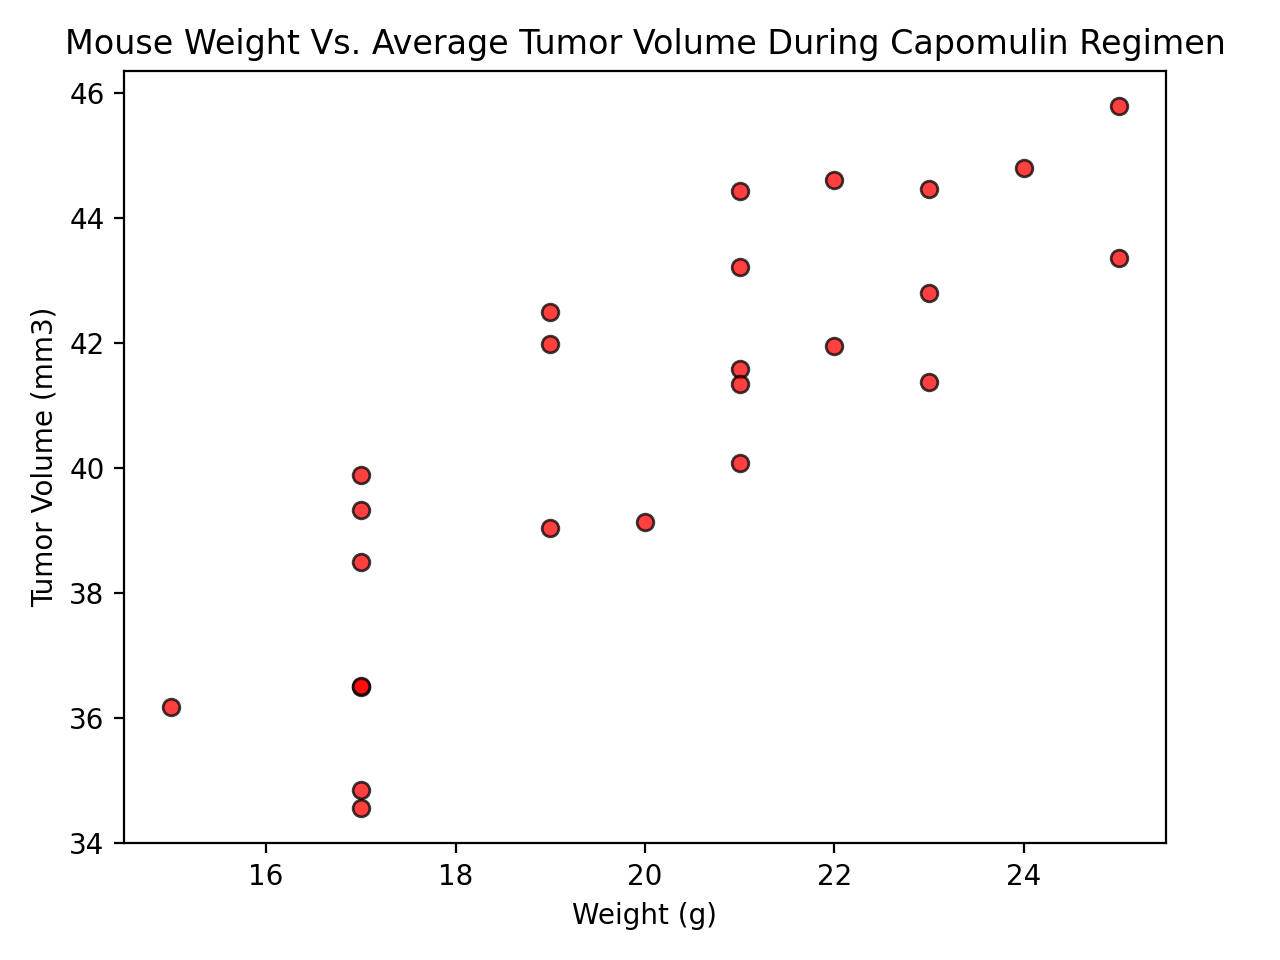

In [240]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mice = capomulin_mice_df.groupby("Mouse ID")

weight_tumor_df = capomulin_mice.mean()
weight_tumor_df

weight = weight_tumor_df["Weight (g)"]

tumor_volume = weight_tumor_df["Tumor Volume (mm3)"]

scatter1 = plt.scatter(weight, tumor_volume, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Mouse Weight Vs. Average Tumor Volume During Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.tight_layout()



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
